<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 1.C - Grafos </h2>
</center>
</p>
</div>


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0 - Detección de ciclos</p></h2>
  
  <p>
  En este ejercicio deberéis implementar un algoritmo capaz de detectar si un grafo cualquiera contiene ciclos.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo que utilizaremos para buscar ciclos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _'TF'_ __: Booleano indicando si el grafo de entrada contiene algún ciclo.</li>
<ul>

</p>

</div>

((((coger un nodo al azar. si solo tiene una aresta descartarlo. ir recorriendo (visitados) hasta que se pueda acabar en el mismo nodo como final. ¿dfs? para parar cuando se encuentre un ciclo))))

no coger un origen = destino. recorrer el grafo sin ir descartando los nodos (pero guardarlos en una lista de visitados. Al ir al siguiente nodo, no considerar el actual, pero comprobar si es un nodo ya visitado. Si lo es, habremos econtrado un ciclo.
considerar tambien que el grafo podria no ser conexo


In [5]:
from collections import deque
from queue import Queue
import random

def _dfs(G, origen):
    visited = set()
    stack = deque()
    stack.appendleft(origen)
    node = origen
    
    while (stack != deque([])):
        node = stack.popleft()
        if node not in visited:
            visited.add(node)
            for n in G.neighbors(node):
                if n in visited:
                    continue
                stack.appendleft(n)
    
    return visited
#_________________________________________________________________

def _cnx(G):
    visited = []
    componentes = []
    
    while (list((set(list(G.nodes()))) - set(visited))):
        nodo = random.choice(list((set(G.nodes())) - set(visited)))        
        visited.extend(list(_dfs(G, nodo)))
        componentes.append(list(_dfs(G,nodo)))
          

    return componentes


In [6]:
from utils import nx
def cycles(G):
    componentes = _cnx(G) #cogemos los componentes del grafo
    previous = dict()
    visited = []
    for node in G.nodes(): #inicializar el diccionario de nodos previos
        previous[node] = None
    for componente in componentes: #para cada componente miramos si va a haber un ciclo (no tiene por que recorrerlos todos)
        origen = random.choice(componente) #comenzamos en un nodo cualquiera del componente
        queue = [origen] #añadimos ese nodo en la queue
        while queue: #mientras haya nodos en la queue
            node_actual = queue.pop() #se cogera el último añadido
            if node_actual not in visited: #si no hemos visitado el nodo anteriormente lo añadiremos a visited
                visited.append(node_actual)
                for n in G.neighbors(node_actual): #comprobamos los vecinos
                    #si uno ya lo hemos visitado
                    if (n in visited) and (previous[node_actual] != n):
                        return True
                    queue.append(n)
                    previous[n] = node_actual
    
    return False

In [7]:
G = nx.generators.barabasi_albert_graph(100, 2)
cycles(G)

True

In [37]:
from utils import nx
from collections import deque

def _cycles(G):
    visited = set() #llista de nodes visitats
    stack = deque() # 
    previous = dict() #diccionari on guardarem els nodes previs de cada node
    
    while (len(visited) != len(list(G.nodes()))):
        node_actual = random.choice(list(G.nodes))
        stack.append(node_actual)
        while ():
            node_actual = stack.pop()
            if node not in visited:
                visited.add(node)
                for n in G.neighbors(node):
                    if n in visited:
                        return True
                    queue.append(n)
                
        if (len(visited) < list(G.nodes())):
            node_actual = random.choice(list(set(G.nodes) - visited))
                
    return False  

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1 - Circuito Euleriano</p></h2>
  <p>
  Se define como circuito euleriano aquel que pasa por todas las aristas de un grafo una única vez y que acaba en el mismo lugar en el que empieza. El problema de los caminos eulerianos fué la base de toda la teoría de grafos y fué postulado por Lehonard Euler en el famoso problema de __los siete puentes de Königsberg__. En este problema Euler se preguntaba si podía acabar en el mismo sitio tras cruzar todos los puentes una sola vez.
  </p>
  <img src="img/konigsberg.jpg"></img>
  <p>
  En este ejercicio se os propone implementar un algoritmo que, dado un grafo _G_ encuentre un camino euleriano.
  </p>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Objeto de tipo grafo sobre el cual queremos encontrar el circuito Euleriano.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _nodelist_ __: Una lista de nodos ordenados que formarían el circuito.</li>
<ul>

</p>

</div>

caso general (el grafo podria no ser conexo). 
el primer y ultimo nodo deben ser el mismo. No se pueden repetir aristas, pero sí nodos. 
da igual el nodo que se elija como origen
lista aristas visitadas

al haber explorado y cerrado el camino sin recorrer todas las aristas, ir al nodo donde tienes mas aristas por visitar, empezando el camino por ahi otra vez (esto cada vez que cierre un ciclo). Al final tendremos una lista de ciclos, que deberemos juntar en una unica lista (abrir el camino en el nodo donde hay mas aristas e inlcluir ahi el "nuevo" ciclo)



In [5]:
from utils import nx
import random

def euler(G):
    origen = random.choice(list(G.nodes()))
    node_actual = origen
    aristas_visitadas = []
    path = [nodo_origen]
    #while (len(path) < len(G.nodes()))
    
    #comprobar que todos los nodos tienen grado par
    for nodo in list(G.nodes()):
        if ((G.edges(nodo))%2 != 0):
            return -1
    
    while (len(path) < len(G.edges())):
        path.append(node_actual)
        for arista in G.edges(node_actual):
            
    
    
    
    
    

F:\Descargas\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


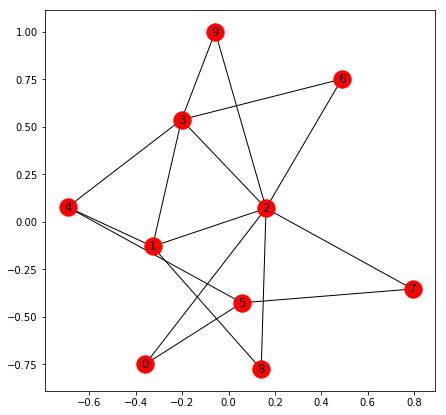

In [3]:
%matplotlib inline
from utils import nx
from utils import draw, random_multiple_component_graph
G = nx.generators.barabasi_albert_graph(10, 2)
draw(G)

<div class="alert alert-warning">
<h1>Pregunta</h1>
<p><strong>
¿Qué condiciones se deben de cumplir para que un grafo cualquiera contenga un camino euleriano? Demuéstralo.
</strong></p>
</div>

<div class="alert alert-warning">
<h1>Extra</h1>
<p><strong>
Además de circuitos Eulerianos, definimos caminos Eulerianos aquellos que recorren todas las aristas de un grafo sin repetirlas, pero no termina en el mismo nodo que empieza. Modifica el algoritmo anterior para que sea capaz de detectar si el grafo contiene un ciclo o un camino Euleriano, y devuelva la lista de nodos ordenados que componen dicho ciclo o camino. Tened en cuenta que son casos excluyentes.
</strong></p>
</div>

In [2]:
if 4 % 2: print('hje')

In [4]:
from random import choice

def euler_path(G):
    # Check if has euler cycle or path
    odd = []
    kind = ''
    for node in G.nodes:
        if G.degree(node) % 2: odd.append(node) # si el nodo es impar se mete en la lista odd
        if len(odd) > 2: break
    if len(odd) == 0: kind = 'cycle'
    elif len(odd) == 2: kind = 'path'
    else: return [], None
   
    # Visited EDGES
    visited = set()
   
    cycles = []
    if kind == 'cycle': # Random starting node
        path = [choice(list(G))]
    elif kind == 'path': # start at node with odd degree
        path = [choice(odd)]
    while len(visited) != len(G.edges):
        node = path[-1]
        neighs = list(G.neighbors(node))
        already_visited = 0
        for neigh in neighs:
            edge = tuple(sorted([node, neigh]))
            # Pick unvisited edge
            if edge not in visited:
                path.append(neigh)
                visited.add(edge)
                break
            else:
                # Count how many neighs have already been visited
                already_visited += 1
               
        # No more edges from this node, we're trapped!! D:
        if len(neighs) == already_visited:
            cycles.append(path)
            # search next node on path
            for node in path:
                # All neighbours of the node
                edges = set([tuple(sorted([node, n])) for n in G.neighbors(node)])
                # Intersect edges with visited
                unvisited = edges - visited
                if unvisited: # If any edge "survived" the intersection, we still 've got edges to visit
                    path = [node]
                    break
                   
    # Reconstruct path from cycles
    if kind == 'cycle': path = []
    for c in cycles:
        if not path: path = c # first
        else:
            idx = path.index(c[0])
            path = path[:idx] + c + path[idx+1:]
    return path, kind

In [5]:
euler_path(G)

([], None)